## Reuters corpus topic classification - explorative data analysis

Let's then take a glimpse of the data, and also change the string targets and codes to lists.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
large_data_strings = pd.read_csv('reuters-csv/inputs.csv', delimiter=';')

In [4]:
large_data_strings.describe()

,text,target,codes
count,299773,299773,299773
unique,295166,8326,8326
top,government 6810 percent central leaf emergency...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['C15', 'C151', 'CCAT']"
freq,58,22203,22203


In [6]:
large_data = large_data_strings.copy(deep=True)
large_data['target'] = large_data['target'].apply(eval)
large_data['codes'] = large_data['codes'].apply(eval)

### Topics

Let's then look at the document topics a bit closer.

In [65]:
topics = pd.read_csv('reuters-csv/topic_codes.txt', delimiter='\t')
topics

,CODE,DESCRIPTION
0,1POL,CURRENT NEWS - POLITICS
1,2ECO,CURRENT NEWS - ECONOMICS
2,3SPO,CURRENT NEWS - SPORT
3,4GEN,CURRENT NEWS - GENERAL
4,6INS,CURRENT NEWS - INSURANCE
...,...,...
121,M142,METALS TRADING
122,M143,ENERGY MARKETS
123,MCAT,MARKETS
124,MEUR,EURO CURRENCY


In [8]:
codes = topics['CODE']
codes

0       1POL
1       2ECO
2       3SPO
3       4GEN
4       6INS
       ...  
121     M142
122     M143
123     MCAT
124     MEUR
125    PRB13
Name: CODE, Length: 126, dtype: object

### Exploring code combination distribution

Let's then do some analysis on the distribution of the topic lists.

Five of the code combinations are quite common, there are 20 000 -10 000 examples for them.

Half of the combinations however have only one example.

In [10]:
code_freqs = large_data_strings['codes'].value_counts()
code_freqs

['C15', 'C151', 'CCAT']                                  22203
['C15', 'C152', 'CCAT']                                  19751
['M11', 'MCAT']                                          15791
['M14', 'M141', 'MCAT']                                  14675
['GCAT', 'GSPO']                                         12390
                                                         ...  
['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']        1
['C11', 'C151', 'C32']                                       1
['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']                      1
['C11', 'C21', 'CCAT', 'M14', 'MCAT']                        1
['C151', 'C24', 'C42', 'GJOB']                               1
Name: codes, Length: 8326, dtype: int64

In [11]:
code_freq_df = code_freqs.to_frame()
code_freq_df

,codes
"['C15', 'C151', 'CCAT']",22203
"['C15', 'C152', 'CCAT']",19751
"['M11', 'MCAT']",15791
"['M14', 'M141', 'MCAT']",14675
"['GCAT', 'GSPO']",12390
...,...
"['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']",1
"['C11', 'C151', 'C32']",1
"['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']",1
"['C11', 'C21', 'CCAT', 'M14', 'MCAT']",1


In [12]:
frequent_combos = code_freq_df[code_freq_df['codes']>10000]
frequent_combos

,codes
"['C15', 'C151', 'CCAT']",22203
"['C15', 'C152', 'CCAT']",19751
"['M11', 'MCAT']",15791
"['M14', 'M141', 'MCAT']",14675
"['GCAT', 'GSPO']",12390


In [14]:
rare_combos = code_freq_df[code_freq_df['codes']<10]
rare_combos

,codes
"['C13', 'C18', 'C183', 'C33', 'CCAT']",9
"['C31', 'CCAT', 'M13', 'M131', 'MCAT']",9
"['C13', 'CCAT', 'GCAT', 'GPOL', 'GVIO']",9
"['C33', 'CCAT', 'E51', 'E512', 'ECAT']",9
"['C12', 'CCAT', 'GCAT', 'GCRIM', 'GENT']",9
...,...
"['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']",1
"['C11', 'C151', 'C32']",1
"['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']",1
"['C11', 'C21', 'CCAT', 'M14', 'MCAT']",1


In [15]:
code_freq_df[code_freq_df['codes']==1]

,codes
"['C11', 'C31', 'CCAT', 'GCAT', 'GWEA']",1
"['C32', 'CCAT', 'M14', 'M141', 'MCAT']",1
"['C13', 'C24', 'C42', 'CCAT', 'E41', 'ECAT', 'GCAT', 'GDIS', 'GJOB', 'M14', 'M142', 'MCAT']",1
"['C24', 'C31', 'C42', 'CCAT', 'E41', 'ECAT', 'GCAT', 'GJOB']",1
"['C31', 'C33', 'CCAT', 'E61', 'ECAT']",1
...,...
"['C11', 'C18', 'C181', 'C183', 'CCAT', 'E12', 'ECAT']",1
"['C11', 'C151', 'C32']",1
"['C31', 'CCAT', 'GCAT', 'GPOL', 'GREL']",1
"['C11', 'C21', 'CCAT', 'M14', 'MCAT']",1


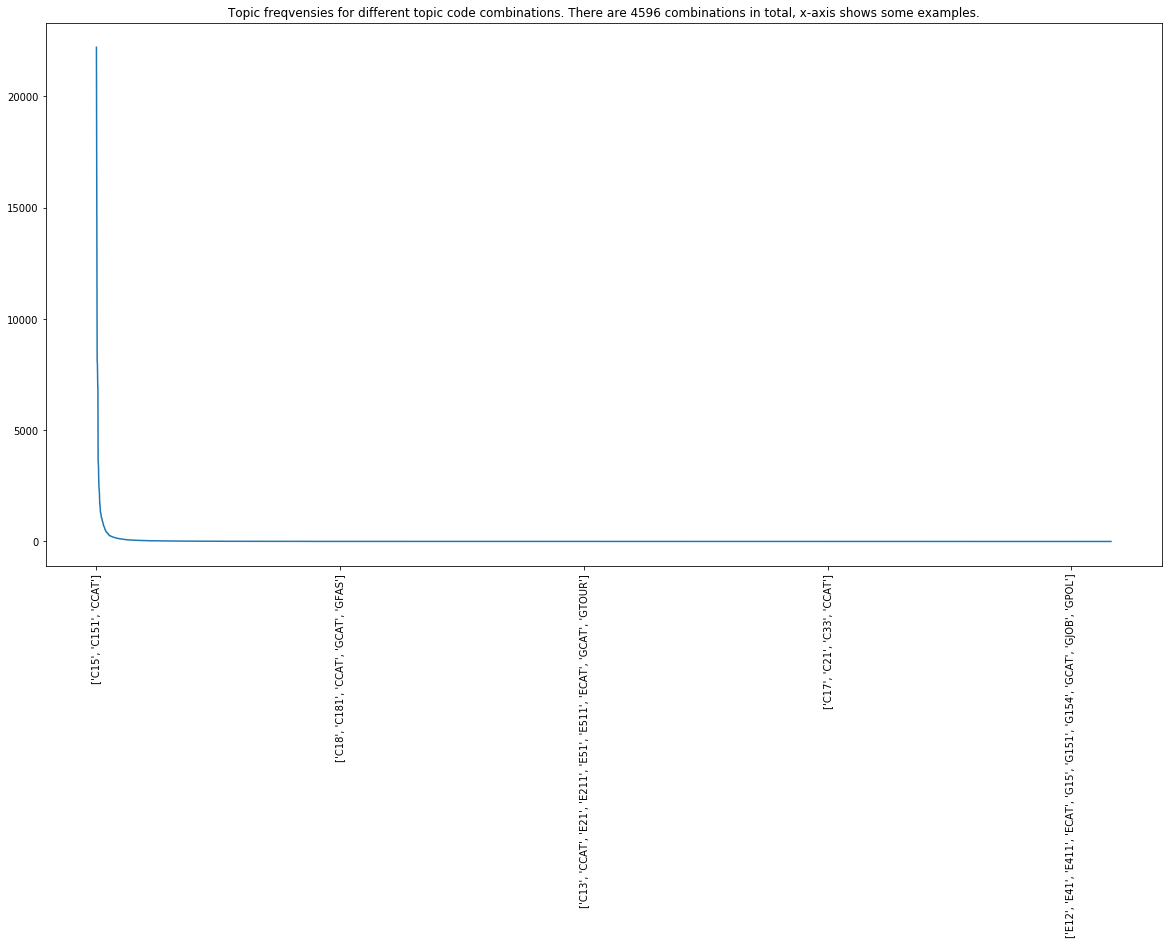

In [17]:
code_freqs.plot(figsize=(20,10), rot=90, title= 'Topic freqvensies for different topic code combinations. There are 4596 combinations in total, x-axis shows some examples.', )

### Single topics

Let's then take a look at the single topic codes. There is quite big differences in how typcical a code is, some codes have been used in  over 100 000 examples, some in under 10. Of the 126 topic 103 are found in the topic arrays.

In [28]:
# function to explore the amounts of single codes, return a sorted dictionary

def code_amount_check(data):
    codes_amount_dict = {}
    for index, code_list in data['codes'].iteritems():
        for code in code_list:
            if codes_amount_dict.get(code) == None:
                codes_amount_dict[code] = 1
            else: 
                codes_amount_dict[code] += 1
                
    sorted_code_amounts = dict(sorted(codes_amount_dict.items(), key=lambda item: item[1]))            
    return sorted_code_amounts          

In [30]:
len(new_dict)

103

In [19]:
large_codes_amount_dict = code_amount_check(large_data)
large_codes_amount_dict

{'GMIL': 4,
 'G159': 8,
 'E312': 19,
 'E313': 38,
 'G156': 55,
 'E142': 70,
 'E61': 122,
 'GFAS': 141,
 'E141': 162,
 'GTOUR': 187,
 'GOBIT': 301,
 'E132': 348,
 'C313': 381,
 'C331': 401,
 'E143': 432,
 'C16': 591,
 'E311': 619,
 'GWELF': 664,
 'G152': 671,
 'G155': 704,
 'E121': 747,
 'E411': 760,
 'G153': 761,
 'E14': 778,
 'G157': 801,
 'E31': 857,
 'C32': 919,
 'E511': 949,
 'C23': 958,
 'GODD': 975,
 'GSCI': 989,
 'GREL': 989,
 'E513': 1019,
 'C173': 1043,
 'G151': 1101,
 'GENT': 1310,
 'C174': 1358,
 'C311': 1423,
 'G158': 1479,
 'GPRO': 1560,
 'C182': 1658,
 'GWEA': 1675,
 'C34': 1843,
 'C22': 1890,
 'E71': 1892,
 'E131': 2011,
 'GHEA': 2111,
 'C312': 2153,
 'E13': 2280,
 'GENV': 2429,
 'C183': 2708,
 'C14': 2770,
 'E11': 2971,
 'G154': 3177,
 'GDEF': 3245,
 'GDIS': 3393,
 'C411': 3682,
 'C42': 3794,
 'C41': 4089,
 'GVOTE': 4222,
 'E512': 4251,
 'C172': 4254,
 'C12': 4693,
 'M142': 4996,
 'C33': 5383,
 'E41': 5693,
 'GJOB': 5759,
 'E211': 6244,
 'C171': 6565,
 'G15': 6731,
 'E5

In [22]:
len(large_codes_amount_dict)

103

In [55]:
codes_amount_df = pd.DataFrame.from_dict(large_codes_amount_dict,  orient='index')
codes_amount_df.reset_index(level=0, inplace=True)
codes_amount_df.rename(columns={0: "AMOUNT", "index": "CODE"}, inplace=True)
codes_amount_df

,CODE,AMOUNT
0,GMIL,4
1,G159,8
2,E312,19
3,E313,38
4,G156,55
...,...,...
98,ECAT,42374
99,C15,59207
100,MCAT,81940
101,GCAT,82580


In [66]:
topics = topics.merge(codes_amount_df)
topics

,CODE,DESCRIPTION,AMOUNT
0,C11,STRATEGY/PLANS,8350
1,C12,LEGAL/JUDICIAL,4693
2,C13,REGULATION/POLICY,13216
3,C14,SHARE LISTINGS,2770
4,C15,PERFORMANCE,59207
...,...,...,...
98,M14,COMMODITY MARKETS,33786
99,M141,SOFT COMMODITIES,19124
100,M142,METALS TRADING,4996
101,M143,ENERGY MARKETS,8658


In [67]:
topics_desc_index = topics.set_index('DESCRIPTION')
topics_desc_index

,CODE,AMOUNT
DESCRIPTION,,
STRATEGY/PLANS,C11,8350
LEGAL/JUDICIAL,C12,4693
REGULATION/POLICY,C13,13216
SHARE LISTINGS,C14,2770
PERFORMANCE,C15,59207
...,...,...
COMMODITY MARKETS,M14,33786
SOFT COMMODITIES,M141,19124
METALS TRADING,M142,4996


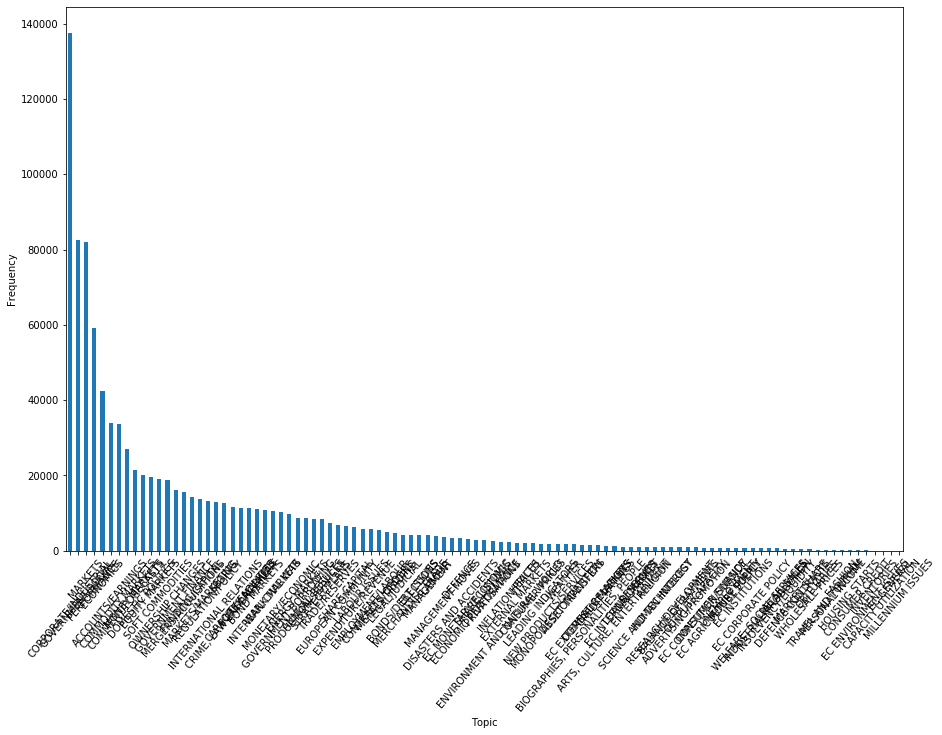

In [63]:
plt.figure(figsize=(15,10))
topics_desc_index.sort_values(by="AMOUNT",ascending=False)["AMOUNT"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.show()

In [69]:
desc_dict = pd.Series(topics.AMOUNT.values,index=topics.DESCRIPTION).to_dict()
desc_dict

{'STRATEGY/PLANS': 8350,
 'LEGAL/JUDICIAL': 4693,
 'REGULATION/POLICY': 13216,
 'SHARE LISTINGS': 2770,
 'PERFORMANCE': 59207,
 'ACCOUNTS/EARNINGS': 33963,
 'ANNUAL RESULTS': 8429,
 'COMMENT/FORECASTS': 27095,
 'INSOLVENCY/LIQUIDITY': 591,
 'FUNDING/CAPITAL': 14398,
 'SHARE CAPITAL': 6565,
 'BONDS/DEBT ISSUES': 4254,
 'LOANS/CREDITS': 1043,
 'CREDIT RATINGS': 1358,
 'OWNERSHIP CHANGES': 18675,
 'MERGERS/ACQUISITIONS': 15598,
 'ASSET TRANSFERS': 1658,
 'PRIVATISATIONS': 2708,
 'PRODUCTION/SERVICES': 8641,
 'NEW PRODUCTS/SERVICES': 1890,
 'RESEARCH/DEVELOPMENT': 958,
 'CAPACITY/FACILITIES': 11338,
 'MARKETS/MARKETING': 13862,
 'DOMESTIC MARKETS': 1423,
 'EXTERNAL MARKETS': 2153,
 'MARKET SHARE': 381,
 'ADVERTISING/PROMOTION': 919,
 'CONTRACTS/ORDERS': 5383,
 'DEFENCE CONTRACTS': 401,
 'MONOPOLIES/COMPETITION': 1843,
 'MANAGEMENT': 4089,
 'MANAGEMENT MOVES': 3682,
 'LABOUR': 3794,
 'CORPORATE/INDUSTRIAL': 137531,
 'ECONOMIC PERFORMANCE': 2971,
 'MONETARY/ECONOMIC': 10253,
 'MONEY SUPPLY':

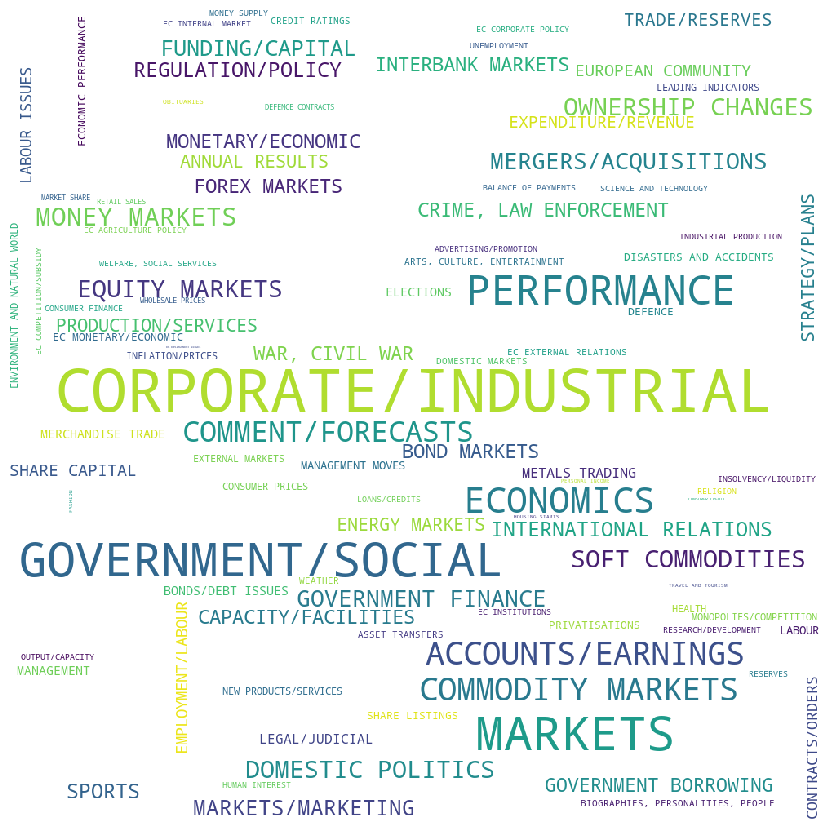

In [77]:
topic_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(desc_dict)
plt.figure(figsize=(15,15))
plt.imshow(topic_cloud)
plt.axis("off")
plt.show()